## Semana 2

### Bibliotecas e dados brutos

In [99]:
# bibliotecas usadas:
import pandas as pd # manipulação dos dados
import seaborn as sns # gráficos

# opcional (ocutar alguns alertas)
import warnings
warnings.filterwarnings('ignore')

In [100]:
dados_brutos = pd.read_csv('tabela_aluracash.csv', sep=';')
dados_brutos.sample(5) #amostra dos dados brutos

,PESSOA,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,EMPRESTIMO,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,SOLICITACAO,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
22390,SWP7hYlJ-hxZN,30.0,51600.0,Alugada,5.0,kN8n5jcA-1FGc,Pagamento de débitos,A,9000.0,6.54,0.0,0.17,UEGLAzYP-iRRb,0.0,6
11200,iFewiKtS-B65A,24.0,78000.0,Própria,8.0,8E2xoRiS-kvop,Educativo,B,25000.0,12.18,0.0,0.32,HZ73rp5F-vkIv,0.0,4
23884,C8it3Ins-N4im,33.0,35050.0,Hipotecada,15.0,F45JFM52-CShp,Médico,A,8000.0,8.32,1.0,0.23,2Z2cJBvd-U3ZM,0.0,6
7230,JDgBQKyX-ePIP,22.0,35000.0,Hipotecada,7.0,1u5yQ6k5-1rYU,Pessoal,B,3500.0,11.49,0.0,0.10,uIeq8FOd-fd7n,0.0,3
3180,AJTPeot4-9x6Y,33.0,79985.0,Hipotecada,6.0,6IbUdFdj-fcqH,Educativo,F,8000.0,21.36,0.0,0.10,vvJXHakA-hHJh,0.0,5


### Informações do dataset

#### Nº de linhas e colunas

In [101]:
dados_brutos.shape

(34485, 15)

#### Colunas + tipos das colunas

In [102]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PESSOA                       34485 non-null  object 
 1   IDADE                        34165 non-null  float64
 2   RENDIMENTO_ANUAL             34150 non-null  float64
 3   SITUACAO_PROPRIEDADE         34154 non-null  object 
 4   ANOS_TRABALHADOS             33231 non-null  float64
 5   EMPRESTIMO                   34485 non-null  object 
 6   MOTIVO_EMPRESTIMO            34174 non-null  object 
 7   PONTUACAO                    34176 non-null  object 
 8   VALOR_EMPRESTIMO             34154 non-null  float64
 9   JUROS                        30859 non-null  float64
 10  POSSIB_INADIMPLENCIA         34142 non-null  float64
 11  EMPRESTIMO_PERC_RENDA_ANUAL  34170 non-null  float64
 12  SOLICITACAO                  34485 non-null  object 
 13  INADIMPLENTE    

#### Dados nulos por colunas

In [103]:
dados_brutos.isnull().sum()

PESSOA                            0
IDADE                           320
RENDIMENTO_ANUAL                335
SITUACAO_PROPRIEDADE            331
ANOS_TRABALHADOS               1254
EMPRESTIMO                        0
MOTIVO_EMPRESTIMO               311
PONTUACAO                       309
VALOR_EMPRESTIMO                331
JUROS                          3626
POSSIB_INADIMPLENCIA            343
EMPRESTIMO_PERC_RENDA_ANUAL     315
SOLICITACAO                       0
INADIMPLENTE                    366
ANOS_PRIMEIRO_CREDITO             0
dtype: int64

#### Dados vazios (tipo string) por colunas

In [104]:
(dados_brutos == '').sum()

PESSOA                         0
IDADE                          0
RENDIMENTO_ANUAL               0
SITUACAO_PROPRIEDADE           0
ANOS_TRABALHADOS               0
EMPRESTIMO                     0
MOTIVO_EMPRESTIMO              0
PONTUACAO                      0
VALOR_EMPRESTIMO               0
JUROS                          0
POSSIB_INADIMPLENCIA           0
EMPRESTIMO_PERC_RENDA_ANUAL    0
SOLICITACAO                    0
INADIMPLENTE                   0
ANOS_PRIMEIRO_CREDITO          0
dtype: int64

#### Criando um subset com as colunes necessárias

In [164]:
dados = dados_brutos[[ 'IDADE', 'RENDIMENTO_ANUAL', 'SITUACAO_PROPRIEDADE',
       'ANOS_TRABALHADOS', 'MOTIVO_EMPRESTIMO', 'PONTUACAO',
       'VALOR_EMPRESTIMO', 'JUROS', 'POSSIB_INADIMPLENCIA',
       'EMPRESTIMO_PERC_RENDA_ANUAL', 'INADIMPLENTE',
       'ANOS_PRIMEIRO_CREDITO']]
dados.sample(5)

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
22732,22.0,75000.0,Alugada,2.0,Pagamento de débitos,B,21000.0,10.00,0.0,0.28,0.0,4
5544,25.0,253000.0,Hipotecada,5.0,Melhora do lar,F,25000.0,17.26,1.0,0.10,0.0,4
29805,23.0,68500.0,Hipotecada,7.0,Educativo,C,4200.0,11.66,0.0,0.06,1.0,4
18546,23.0,50205.0,Hipotecada,7.0,Pagamento de débitos,A,5300.0,5.42,0.0,0.11,0.0,4
4941,23.0,10008.0,Alugada,NaN,Pagamento de débitos,B,1600.0,10.36,1.0,0.16,0.0,2


### Remoção de dados nulos

Será removida linhas com 2 ou mais dados nulos.

In [166]:
dados_nulos = dados[dados[['IDADE', 'RENDIMENTO_ANUAL']].isnull().all(1)]
dados_nulos.sample(5)

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
10297,NaN,NaN,Hipotecada,5.0,Melhora do lar,B,10000.0,10.36,0.0,0.12,0.0,4
2046,NaN,NaN,Alugada,0.0,Pagamento de débitos,D,18400.0,9.63,0.0,0.15,0.0,9
10893,NaN,NaN,Alugada,1.0,Pessoal,B,14000.0,12.42,0.0,0.27,0.0,10
1559,NaN,NaN,Alugada,7.0,Pessoal,C,20000.0,14.17,0.0,0.18,0.0,3
29089,NaN,NaN,Hipotecada,11.0,Empreendimento,A,8800.0,7.51,0.0,0.15,0.0,9


In [167]:
dados = dados.drop(dados_nulos.index)
dados.shape

(34449, 12)

In [168]:
dados_nulos = dados[dados[['IDADE', 'SITUACAO_PROPRIEDADE']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)
dados.shape

(34421, 12)

In [169]:
dados_nulos = dados[dados[['IDADE', 'ANOS_TRABALHADOS']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)
dados.shape

(34381, 12)

In [170]:
dados_nulos = dados[dados[['IDADE', 'MOTIVO_EMPRESTIMO']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)
dados.shape

(34357, 12)

In [171]:
dados_nulos = dados[dados[['IDADE', 'PONTUACAO']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)
dados.shape

(34334, 12)

In [172]:
dados_nulos = dados[dados[['IDADE', 'VALOR_EMPRESTIMO']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)
dados.shape

(34303, 12)

In [173]:
dados_nulos = dados[dados[['IDADE', 'JUROS']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)
dados.shape

(34267, 12)

In [174]:
dados_nulos = dados[dados[['IDADE', 'POSSIB_INADIMPLENCIA']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)
dados.shape

(34238, 12)

In [175]:
dados_nulos = dados[dados[['IDADE', 'EMPRESTIMO_PERC_RENDA_ANUAL']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)
dados.shape

(34214, 12)

In [176]:
dados_nulos = dados[dados[['IDADE', 'INADIMPLENTE']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)
dados.shape

(34181, 12)

In [177]:
dados_nulos = dados[dados[['IDADE', 'ANOS_PRIMEIRO_CREDITO']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)
dados.shape

(34181, 12)

In [179]:
dados_nulos = dados[dados[['RENDIMENTO_ANUAL', 'SITUACAO_PROPRIEDADE']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)

dados_nulos = dados[dados[['RENDIMENTO_ANUAL', 'ANOS_TRABALHADOS']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)

dados_nulos = dados[dados[['RENDIMENTO_ANUAL', 'MOTIVO_EMPRESTIMO']].isnull().all(1)]
dados = dados.drop(dados_nulos.index)

dados.shape

(34119, 12)

In [178]:
[ 'RENDIMENTO_ANUAL', 'SITUACAO_PROPRIEDADE',
       'ANOS_TRABALHADOS', 'MOTIVO_EMPRESTIMO', 'PONTUACAO',
       'VALOR_EMPRESTIMO', 'JUROS', 'POSSIB_INADIMPLENCIA',
       'EMPRESTIMO_PERC_RENDA_ANUAL', 'INADIMPLENTE',
       'ANOS_PRIMEIRO_CREDITO']

['IDADE',
 'RENDIMENTO_ANUAL',
 'SITUACAO_PROPRIEDADE',
 'ANOS_TRABALHADOS',
 'MOTIVO_EMPRESTIMO',
 'PONTUACAO',
 'VALOR_EMPRESTIMO',
 'JUROS',
 'POSSIB_INADIMPLENCIA',
 'EMPRESTIMO_PERC_RENDA_ANUAL',
 'INADIMPLENTE',
 'ANOS_PRIMEIRO_CREDITO']

Analisando as variáveis categóricas.

#### SITUACAO_PROPRIEDADE

In [51]:
dados['SITUACAO_PROPRIEDADE'].sort_values().unique()

array(['Alugada', 'Hipotecada', 'Outros', 'Própria', nan], dtype=object)

Foi preferível preencher os dados nulos com 'Desconhecida'.

In [52]:
dados['SITUACAO_PROPRIEDADE'] = dados['SITUACAO_PROPRIEDADE'].fillna('Desconhecida')
dados['SITUACAO_PROPRIEDADE'].value_counts(normalize = True) *100

Alugada         49.978251
Hipotecada      40.864144
Própria          7.878788
Desconhecida     0.959838
Outros           0.318979
Name: SITUACAO_PROPRIEDADE, dtype: float64

#### MOTIVO_EMPRESTIMO

In [53]:
dados['MOTIVO_EMPRESTIMO'].sort_values().unique()

array(['Educativo', 'Empreendimento', 'Melhora do lar', 'Médico',
       'Pagamento de débitos', 'Pessoal', nan], dtype=object)

In [54]:
dados['MOTIVO_EMPRESTIMO'] = dados['MOTIVO_EMPRESTIMO'].fillna('Desconhecido')
dados['MOTIVO_EMPRESTIMO'].value_counts(normalize = True) *100

Educativo               19.631724
Médico                  18.500797
Empreendimento          17.332173
Pessoal                 16.766710
Pagamento de débitos    15.879368
Melhora do lar          10.987386
Desconhecido             0.901841
Name: MOTIVO_EMPRESTIMO, dtype: float64

#### PONTUACAO

In [55]:
dados['PONTUACAO'].sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', nan], dtype=object)

Foi criada a categoria 'X' para a coluna **PONTUACAO**.

In [57]:
dados['PONTUACAO'] = dados['PONTUACAO'].fillna('X')
dados['PONTUACAO'].value_counts(normalize = True) *100

A    32.834566
B    31.764535
C    19.617225
D    11.048282
E     2.917210
X     0.896042
F     0.736552
G     0.185588
Name: PONTUACAO, dtype: float64

Analisando as variáveis numéricas.

In [58]:
dados.isnull().sum()

IDADE                             0
RENDIMENTO_ANUAL                335
SITUACAO_PROPRIEDADE              0
ANOS_TRABALHADOS               1254
MOTIVO_EMPRESTIMO                 0
PONTUACAO                         0
VALOR_EMPRESTIMO                331
JUROS                          3626
POSSIB_INADIMPLENCIA            343
EMPRESTIMO_PERC_RENDA_ANUAL     315
INADIMPLENTE                    366
ANOS_PRIMEIRO_CREDITO             0
dtype: int64

Os dados nulos foram preenchidos utilizando o método 'ffill'.

In [59]:
dados = dados.fillna(method="ffill")
dados.isnull().sum()

IDADE                          0
RENDIMENTO_ANUAL               0
SITUACAO_PROPRIEDADE           0
ANOS_TRABALHADOS               0
MOTIVO_EMPRESTIMO              0
PONTUACAO                      0
VALOR_EMPRESTIMO               0
JUROS                          0
POSSIB_INADIMPLENCIA           0
EMPRESTIMO_PERC_RENDA_ANUAL    0
INADIMPLENTE                   0
ANOS_PRIMEIRO_CREDITO          0
dtype: int64

### Tratamento de outliers

A variáveis categórias não serão tratadas aqui.

#### IDADE

In [60]:
dados['IDADE'].sort_values().unique()

array([ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
        31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
        53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  69.,  70.,  73.,  76.,  78.,  80.,  84.,
        94., 123., 144.])

Foi detectada idades superior a 120 anos.

In [61]:
dados[dados['IDADE'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
12360,144.0,6000000.0,Hipotecada,12.0,Pessoal,C,5000.0,12.73,0.0,0.00,0.0,25
18648,123.0,80004.0,Alugada,2.0,Educativo,B,20400.0,10.25,0.0,0.25,0.0,3
19597,144.0,200000.0,Hipotecada,4.0,Educativo,B,6000.0,11.86,0.0,0.03,0.0,2
23469,123.0,78000.0,Alugada,7.0,Empreendimento,B,20000.0,9.70,0.0,0.26,0.0,4
32584,144.0,250000.0,Alugada,4.0,Empreendimento,C,4800.0,13.57,0.0,0.02,0.0,3


O peso de 5 linhas num dataset de mais de 34 mil linhas é extremamente pequeno, essas linhas foram excuídas.

In [67]:
dados = dados.drop(dados[dados['IDADE'] > 120].index)
dados[dados['IDADE'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO


#### RENDIMENTO_ANUAL

In [69]:
dados['RENDIMENTO_ANUAL'].sort_values().unique()

array([   4000.,    4080.,    4200., ..., 1782000., 1900000., 2039784.])

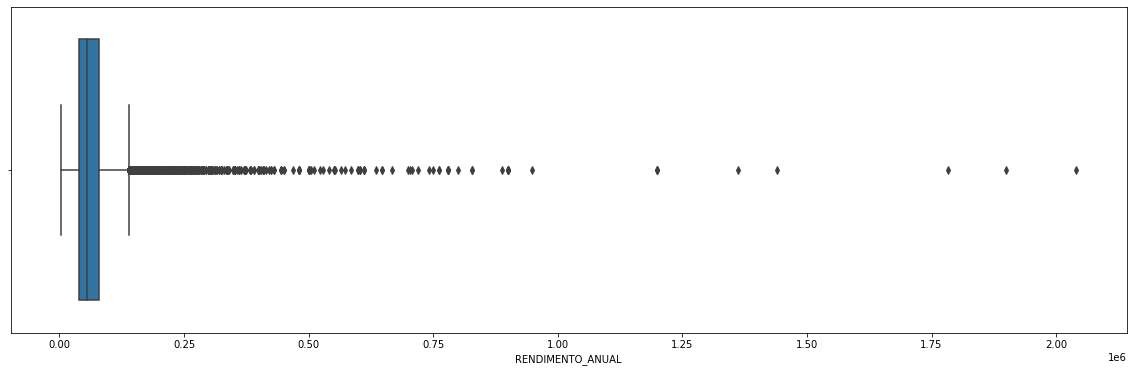

In [86]:
ax = sns.boxplot(x=dados['RENDIMENTO_ANUAL'])
ax.figure.set_size_inches(20, 6)

In [90]:
dados[dados['RENDIMENTO_ANUAL'] > 250000]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
205,33.0,612000.0,Alugada,3.0,Médico,C,5950.0,12.73,0.0,0.01,1.0,10
297,30.0,270000.0,Hipotecada,7.0,Melhora do lar,E,35000.0,19.69,0.0,0.13,0.0,8
309,31.0,258000.0,Hipotecada,3.0,Pessoal,A,28000.0,5.99,0.0,0.11,0.0,5
347,43.0,350000.0,Hipotecada,3.0,Pessoal,B,18000.0,11.49,0.0,0.05,0.0,14
368,35.0,280000.0,Hipotecada,19.0,Melhora do lar,C,21600.0,12.99,0.0,0.08,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
33036,23.0,500000.0,Hipotecada,7.0,Pagamento de débitos,B,30000.0,10.65,0.0,0.06,0.0,3
33199,26.0,280000.0,Alugada,4.0,Pessoal,C,10000.0,15.96,0.0,0.04,1.0,3
33524,28.0,266000.0,Hipotecada,12.0,Pessoal,A,9000.0,5.42,0.0,0.03,0.0,10
33815,23.0,300000.0,Hipotecada,5.0,Educativo,D,10000.0,15.65,0.0,0.03,1.0,2


Há pessoas com rendimento anual superior a 250 mil. Esses dados foram eliminados.

#### ANOS_TRABALHADOS

In [72]:
dados['ANOS_TRABALHADOS'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  34.,
        38.,  41., 123.])

Há dois cidadãos que trabalharam por "123 anos", definitivamente são um outliers. 

In [73]:
dados[dados['ANOS_TRABALHADOS'] > 100]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
25055,22.0,59000.0,Alugada,123.0,Pessoal,D,35000.0,16.02,1.0,0.59,1.0,3
31592,21.0,192000.0,Hipotecada,123.0,Empreendimento,A,20000.0,6.54,0.0,0.10,0.0,4


In [74]:
dados = dados.drop(dados[dados['ANOS_TRABALHADOS'] > 120].index)
dados[dados['ANOS_TRABALHADOS'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO


#### VALOR_EMPRESTIMO

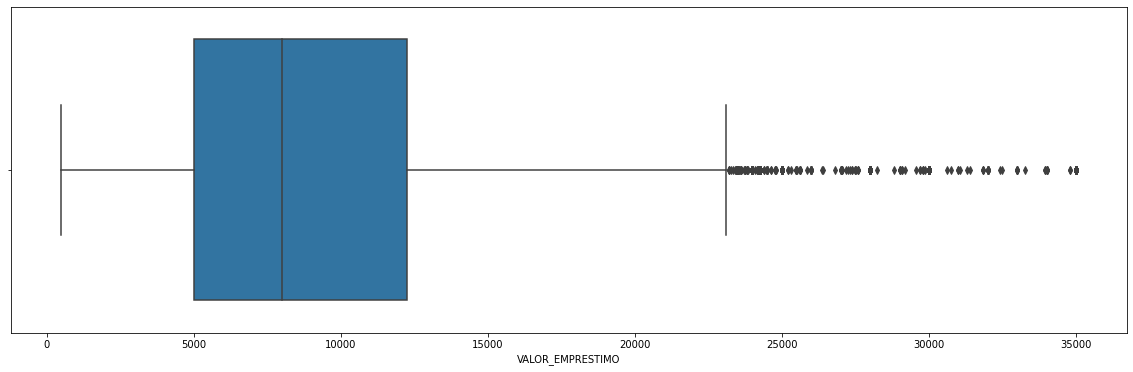

In [77]:
ax = sns.boxplot(x=dados['VALOR_EMPRESTIMO'])
ax.figure.set_size_inches(20, 6)

Não vejo nenhum problema em pegar empréstimos com valores elevados.

#### JUROS

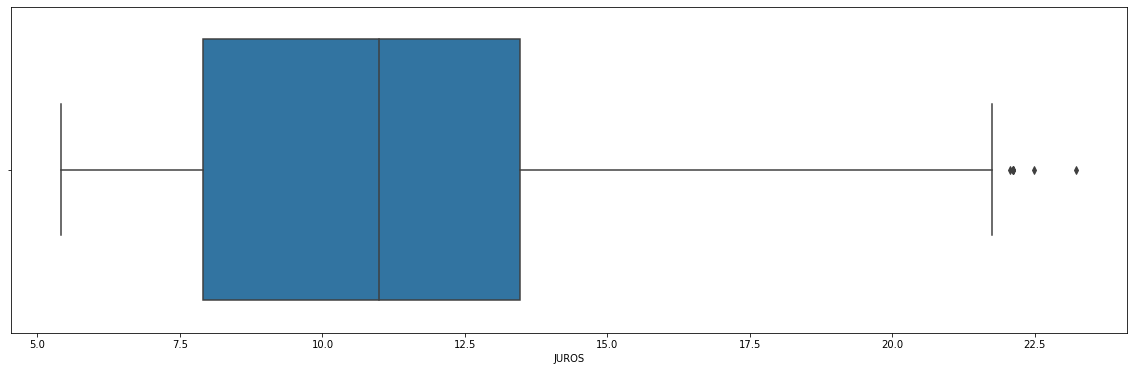

In [78]:
ax = sns.boxplot(x=dados['JUROS'])
ax.figure.set_size_inches(20, 6)

Nada anormal com os juros.

#### EMPRESTIMO_PERC_RENDA_ANUAL

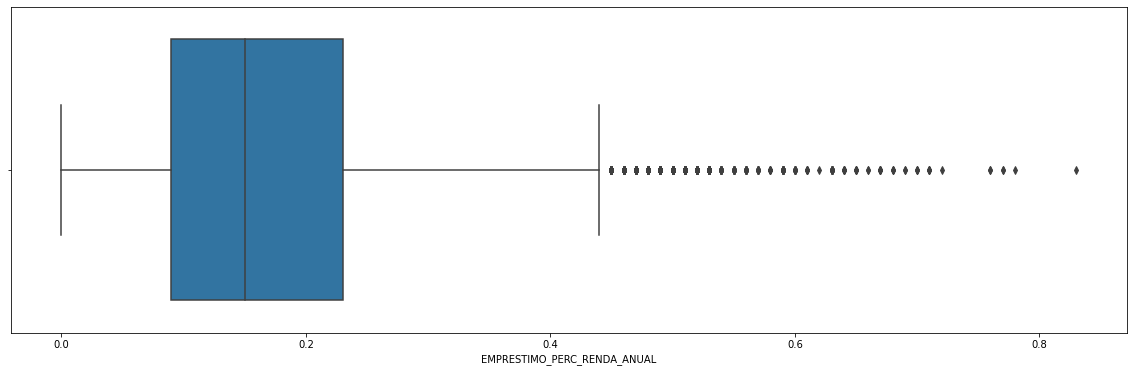

In [79]:
ax = sns.boxplot(x=dados['EMPRESTIMO_PERC_RENDA_ANUAL'])
ax.figure.set_size_inches(20, 6)

Nada anormal aqui.

#### ANOS_PRIMEIRO_CREDITO

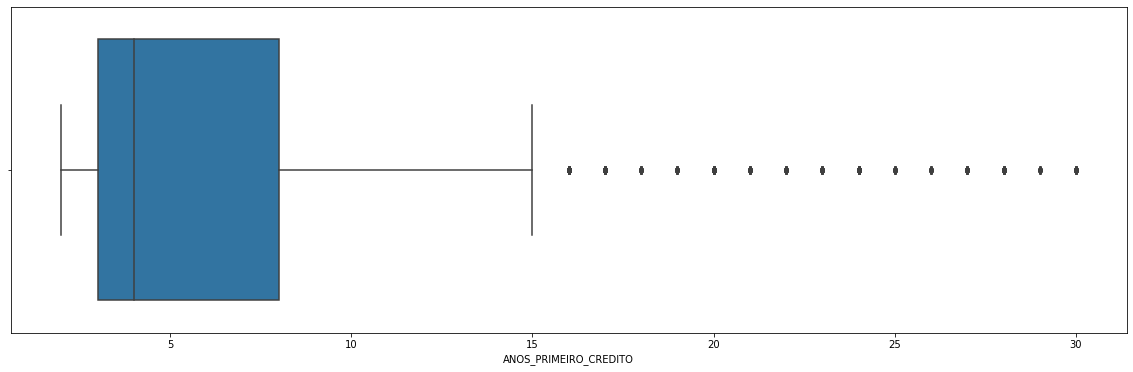

In [84]:
ax = sns.boxplot(x=dados['ANOS_PRIMEIRO_CREDITO'])
ax.figure.set_size_inches(20, 6)

Nada anormal aqui.

#### Resultado final

In [85]:
dados.shape

(34478, 12)

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
871,30.0,32004.0,Alugada,1.0,Pessoal,B,24250.0,11.12,1.0,0.76,0.0,5
2241,22.0,20000.0,Hipotecada,0.0,Pessoal,B,16600.0,9.76,0.0,0.83,0.0,3
4928,35.0,85000.0,Alugada,5.0,Pagamento de débitos,A,24250.0,11.12,1.0,0.76,0.0,5
7011,26.0,26000.0,Alugada,10.0,Educativo,B,20050.0,9.76,1.0,0.77,0.0,2
19068,32.0,12000.0,Alugada,1.0,Médico,A,9325.0,8.38,1.0,0.78,0.0,6
27738,21.0,19500.0,Hipotecada,0.0,Educativo,B,15000.0,9.64,1.0,0.77,0.0,2


## Notebook WIP...